In [1]:
import requests
import pandas as pd

# Your Polygon API key
api_key = "ApzZjkbNxniqipUt0nywPCtxeGLAHIwJ"


# #Top 50 stocks by market cap
# tickers = [
#     "AAPL", "NVDA", "MSFT", "GOOG", "AMZN", "META", "BRK.B", "TSM",
#     "LLY", "AVGO", "TSLA", "JPM", "WMT", "NVO", "UNH", "XOM", "V", 
#     "TCEHY", "MA", "PG", "JNJ", "COST", "SSNLF", "ORCL", "LVMUY", 
#     "HD", "ASML", "ABBV", "BAC", "KO", "ICBC", "NFLX", "MRK", 
#     "NSRGY", "RHHBY", "CVX", "AZN", "CRM", "HESAY", "SAP", "KWEICHOW", 
#     "ADBE", "IHC", "RELIANCE", "PEP", "PFE", "INTC", "CSCO", "NKE"
# ]

# #Top 100 stocks by market cap
# tickers = [
#     "AAPL", "MSFT", "GOOG", "AMZN", "NVDA", "META", "TSLA", "BRK.B", 
#     "UNH", "XOM", "V", "JNJ", "PG", "MA", "WMT", "LLY", "HD", 
#     "CVX", "ABBV", "PEP", "KO", "MRK", "ORCL", "COST", "TMO", 
#     "AVGO", "DIS", "PFE", "BAC", "ADBE", "CRM", "NFLX", "CMCSA", 
#     "TXN", "NKE", "QCOM", "CSCO", "MCD", "AMD", "NEE", "ACN", 
#     "LIN", "DHR", "IBM", "UPS", "RTX", "ABT", "LMT", "PM", 
#     "LOW", "MDT", "MS", "INTC", "AMAT", "CAT", "EL", "INTU", 
#     "GE", "HON", "SBUX", "SPGI", "NOW", "BLK", "BKNG", "TGT", 
#     "ISRG", "CVS", "PLD", "AMGN", "DE", "GS", "MO", "WM", 
#     "SYK", "CME", "SCHW", "AXP", "ADI", "ETN", "VRTX", "KLAC", 
#     "REGN", "TFC", "ADP", "GILD", "MU", "FISV", "VRTX", "ZS", 
#     "OKTA", "CRWD", "SNOW", "ZM", "PINS", "SHOP", "PYPL", "UBER", 
#     "LYFT", "DASH", "LCID", "RIVN", "HOOD", "COIN", "DKNG"
# ]

#Top 1000 stocks by market cap
tickers = [
    "A", "AA", "AAPL", "ABBV", "ABC", "ABMD", "ABT", "ACGL", "ACN", "ADBE", 
    "ADI", "ADM", "ADP", "ADSK", "AEE", "AEP", "AES", "AFL", "AIG", "AIZ", 
    "AJG", "AKAM", "ALB", "ALGN", "ALK", "ALL", "ALLE", "AMAT", "AMCR", 
    "AMD", "AME", "AMGN", "AMP", "AMT", "AMZN", "ANET", "AON", "AOS", "APA", 
    "APD", "APH", "APTV", "ARE", "ATO", "ATVI", "AVB", "AVGO", "AVY", "AWK", 
    "AXP", "AZO", "BA", "BAC", "BALL", "BAX", "BBWI", "BBY", "BDX", "BEN", 
    "BIIB", "BIO", "BK", "BKNG", "BKR", "BLK", "BLL", "BMY", "BR", "BRK.B", 
    "BRO", "BSX", "BWA", "BXP", "C", "CAG", "CAH", "CARR", "CAT", "CB", 
    "CBOE", "CBRE", "CCI", "CCL", "CDAY", "CDNS", "CDW", "CE", "CEG", "CF", 
    "CFG", "CHD", "CHRW", "CHTR", "CI", "CINF", "CL", "CLX", "CMA", "CMCSA", 
    "CME", "CMG", "CMS", "CNC", "CNP", "COF", "COO", "COP", "COST", "CPB", 
    "CPRT", "CPT", "CRL", "CRM", "CSCO", "CSGP", "CSX", "CTAS", "CTLT", 
    "CTRA", "CTSH", "CTVA", "CVS", "CVX", "D", "DAL", "DD", "DE", "DFS", 
    "DG", "DGX", "DHI", "DHR", "DIS", "DISCA", "DISCK", "DISH", "DLR", "DLTR", 
    "DOV", "DOW", "DPZ", "DRE", "DRI", "DTE", "DUK", "DVA", "DVN", "DXCM", 
    "DXC", "EA", "EBAY", "ECL", "ED", "EFX", "EIX", "EL", "EMN", "EMR", 
    "ENPH", "EOG", "EPAM", "EQIX", "EQR", "ES", "ESS", "ETN", "ETR", "ETSY", 
    "EVRG", "EW", "EXC", "EXPD", "EXPE", "EXR", "F", "FANG", "FAST", "FBHS", 
    "FCX", "FDS", "FDX", "FE", "FFIV", "FIS", "FISV", "FITB", "FLT", "FMC", 
    "FOX", "FOXA", "FRC", "FRT", "FTNT", "FTV", "GD", "GE", "GEHC", "GILD", 
    "GIS", "GL", "GLW", "GM", "GNRC", "GOOG", "GOOGL", "GPC", "GPN", "GRMN", 
    "GS", "GWW", "HAL", "HAS", "HBAN", "HBI", "HCA", "HD", "HES", "HIG", 
    "HII", "HLT", "HOLX", "HON", "HPE", "HPQ", "HRL", "HSIC", "HST", "HSY", 
    "HUM", "HWM", "IBM", "ICE", "IDXX", "IEX", "IFF", "ILMN", "INCY", "INTC", 
    "INTU", "IP", "IPG", "IQV", "IR", "IRM", "ISRG", "IT", "ITW", "IVZ", 
    "J", "JBHT", "JCI", "JKHY", "JNJ", "JNPR", "JPM", "K", "KEY", "KEYS", 
    "KHC", "KIM", "KLAC", "KMB", "KMI", "KMX", "KO", "KR", "L", "LDOS", 
    "LEG", "LEN", "LH", "LHX", "LIN", "LKQ", "LMT", "LNC", "LNT", "LOW", 
    "LRCX", "LW", "LYB", "LYV", "MA", "MAA", "MAR", "MAS", "MAT", "MCD", 
    "MCHP", "MCK", "MCO", "MDLZ", "MDT", "MET", "META", "MGM", "MHK", "MKC", 
    "MKTX", "MLM", "MMC", "MMM", "MNST", "MO", "MOS", "MPWR", "MRK", "MRO", 
    "MS", "MSCI", "MSFT", "MSI", "MTB", "MTD", "MU", "NCLH", "NDAQ", "NDSN", 
    "NEE", "NEM", "NFLX", "NI", "NKE", "NOC", "NOW", "NRG", "NSC", "NTAP", 
    "NTRS", "NUE", "NVDA", "NVR", "NWL", "NWS", "NWSA", "NXPI", "O", "ODFL", 
    "OGN", "OHI", "OKE", "OMC", "ON", "ORCL", "ORLY", "OTIS", "OXY", "PARA", 
    "PAYC", "PAYX", "PCAR", "PCG", "PEAK", "PEG", "PEP", "PFE", "PFG", 
    "PG", "PGR", "PH", "PHM", "PKG", "PKI", "PLD", "PM", "PNC", "PNR", 
    "PNW", "POOL", "PPG", "PPL", "PRGO", "PRU", "PSA", "PSX", "PTC", "PVH", 
    "PWR", "PXD", "PYPL", "QCOM", "QRVO", "RCL", "RE", "REG", "REGN", "RF", 
    "RHI", "RJF", "RL", "RMD", "ROK", "ROL", "ROP", "ROST", "RSG", "RTX", 
    "SBAC", "SBNY", "SBUX", "SCHW", "SEDG", "SEE", "SHW", "SIRI", "SIVB", 
    "SJM", "SLB", "SNA", "SNPS", "SO", "SPG", "SPGI", "SRE", "STE", "STT", 
    "STX", "STZ", "SWK", "SWKS", "SYF", "SYK", "SYY", "T", "TAP", "TDG", 
    "TDY", "TECH", "TEL", "TER", "TFC", "TFX", "TGT", "TJX", "TMO", "TMUS", 
    "TPR", "TRGP", "TRMB", "TROW", "TRV", "TSCO", "TSLA", "TSN", "TT", 
    "TTWO", "TXN", "TXT", "TYL", "UAL", "UBER", "UDR", "UHS", "ULTA", "UNH", 
    "UNP", "UPS", "URI", "USB", "V", "VICI", "VLO", "VMC", "VRSK", "VRTX", 
    "WAB", "WAT", "WBA", "WBD", "WDC", "WEC", "WELL", "WFC", "WM", "WMB", 
    "WMT", "WRB", "WST", "WY", "WYNN", "XEL", "XOM", "XYL", "YUM", "ZBH", 
    "ZBRA", "ZTS"
]

# Function to fetch financial data from Polygon for Q4 2023
def get_financial_data(ticker, api_key):
    # Specify query parameters for Q4 2023
    fiscal_period = "Q4"
    fiscal_year = "2023"
    
    url = f"https://api.polygon.io/vX/reference/financials?ticker={ticker}&fiscal_period={fiscal_period}&fiscal_year={fiscal_year}&limit=1&apiKey={api_key}"
    response = requests.get(url)
    data = response.json()
    
    # Check if results exist in the API response
    if 'results' in data and len(data['results']) > 0:
        financials = data['results'][0].get('financials', {})
        
        # Safely access nested financial data
        ebit = financials.get('income_statement', {}).get('operating_income_loss', {}).get('value', 0)
        cash = financials.get('balance_sheet', {}).get('current_assets', {}).get('value', 0)
        debt = financials.get('balance_sheet', {}).get('liabilities', {}).get('value', 0)
        equity = financials.get('balance_sheet', {}).get('equity', {}).get('value', 0)
        market_cap = equity + debt - cash  # Approximation of Market Cap
        nwc = (financials.get('balance_sheet', {}).get('current_assets', {}).get('value', 0) -
               financials.get('balance_sheet', {}).get('current_liabilities', {}).get('value', 0))
        net_fixed_assets = financials.get('balance_sheet', {}).get('noncurrent_assets', {}).get('value', 0)
        
        return {
            'Ticker': ticker,
            'EBIT': ebit,
            'Cash': cash,
            'Debt': debt,
            'Market Cap': market_cap,
            'Net Working Capital': nwc,
            'Net Fixed Assets': net_fixed_assets
        }
    else:
        print(f"No financial data found for {ticker} in Q4 2023.")
        return None

# Function to calculate Magic Formula metrics
def calculate_magic_formula(financial_data):
    ebit = financial_data.get('EBIT', 0)
    ev = financial_data.get('Market Cap', 1)  # Avoid division by zero

    # Calculate Return on Capital (ROC)
    nwc = financial_data.get('Net Working Capital', 0)
    nfa = financial_data.get('Net Fixed Assets', 0)
    if nwc + nfa == 0:
        roc = 0  # Avoid division by zero
    else:
        roc = ebit / (nwc + nfa)

    # Calculate Earnings Yield (EY)
    if ev == 0:
        ey = 0  # Avoid division by zero
    else:
        ey = ebit / ev

    return {'Earnings Yield': ey, 'Return on Capital': roc}

# Collect financial data for all tickers
results = []
for ticker in tickers:
    financial_data = get_financial_data(ticker, api_key)
    if financial_data:
        magic_formula = calculate_magic_formula(financial_data)
        financial_data.update(magic_formula)
        results.append(financial_data)

# Convert results into a DataFrame
df = pd.DataFrame(results)

# Rank companies by Magic Formula metrics
df['EY Rank'] = df['Earnings Yield'].rank(ascending=False)  # Higher EY is better
df['ROC Rank'] = df['Return on Capital'].rank(ascending=False)  # Higher ROC is better
df['Magic Formula Rank'] = (df['EY Rank'] + df['ROC Rank']).rank()

# Sort companies by their Magic Formula Rank
df = df.sort_values(by='Magic Formula Rank')

# Display the ranked results
print(df[['Ticker', 'Earnings Yield', 'Return on Capital', 'Magic Formula Rank']])


No financial data found for DISCA in Q4 2023.
No financial data found for DISCK in Q4 2023.
No financial data found for FRC in Q4 2023.
No financial data found for SBNY in Q4 2023.
    Ticker  Earnings Yield  Return on Capital  Magic Formula Rank
202    GPC        1.704165           1.461436                 1.0
327   NVDA        2.327967           0.836145                 2.0
138    DPZ        0.955405           0.682094                 3.0
2     AAPL        0.581227           0.653361                 4.5
279     MA        0.602713           0.501486                 4.5
..     ...             ...                ...                 ...
463    WBA       -0.225115          -0.260262               479.0
232   ILMN       -0.321615          -0.232387               480.0
441   TTWO       -0.320620          -0.336685               481.0
265    LEG       -0.410833          -0.322190               482.0
397   SEDG       -2.372596          -0.866229               483.0

[483 rows x 4 columns]


In [2]:
from datetime import datetime


# Define the Polygon API key
api_key = "ApzZjkbNxniqipUt0nywPCtxeGLAHIwJ"

# Define date range and tickers
start_date = "2024-02-21"
end_date = datetime.today().strftime('%Y-%m-%d')
top_30_tickers = df.head(30)['Ticker'].tolist()  # Assuming `df` from Magic Formula ranking

# Function to fetch historical prices
def get_historical_prices(ticker, start_date, end_date, api_key):
    url = f"https://api.polygon.io/v2/aggs/ticker/{ticker}/range/1/day/{start_date}/{end_date}?adjusted=true&apiKey={api_key}"
    response = requests.get(url)
    data = response.json()

    if 'results' in data and len(data['results']) > 0:
        prices = [result['c'] for result in data['results']]  # Closing prices
        return prices
    else:
        print(f"No historical data found for {ticker}.")
        return []

# Function to calculate return and max drawdown
def calculate_metrics(prices):
    if len(prices) < 2:
        return 0, 0  # No meaningful data
    # Total return in percentage
    total_return = ((prices[-1] - prices[0]) / prices[0]) * 100

    # Max drawdown in percentage
    peak = prices[0]
    max_drawdown = 0
    for price in prices:
        if price > peak:
            peak = price
        drawdown = ((peak - price) / peak) * 100
        max_drawdown = max(max_drawdown, drawdown)

    return total_return, max_drawdown

# Collect results for individual stocks
portfolio_results = []
for ticker in top_30_tickers:
    prices = get_historical_prices(ticker, start_date, end_date, api_key)
    if prices:
        stock_return, max_dd = calculate_metrics(prices)
        portfolio_results.append({'Ticker': ticker, 'Return (%)': stock_return, 'Max Drawdown (%)': max_dd})

# Convert to DataFrame
portfolio_df = pd.DataFrame(portfolio_results)

# Calculate portfolio metrics (equally weighted portfolio)
average_return = portfolio_df['Return (%)'].mean()
average_drawdown = portfolio_df['Max Drawdown (%)'].mean()

# Add portfolio results
portfolio_summary = {
    'Portfolio Return (%)': average_return,
    'Portfolio Max Drawdown (%)': average_drawdown
}

# Display results
print("Individual Stock Metrics:")
print(portfolio_df)
print("\nPortfolio Summary:")
print(portfolio_summary)


Individual Stock Metrics:
   Ticker  Return (%)  Max Drawdown (%)
0     GPC  -12.834002         30.768760
1    NVDA  105.729784         27.046762
2     DPZ    8.788858         24.570872
3    AAPL   35.338964         11.749425
4      MA   13.891733         12.082515
5    IDXX  -18.762731         29.460710
6    FAST   14.204465         20.823769
7    PAYX   14.194280          8.513152
8     GWW   23.485718         14.619980
9     ADP   17.186515          8.766170
10    YUM    2.847001         12.039947
11    AJG   21.553519          9.907375
12    MTD    7.354111         24.166476
13   EXPD    2.324003         10.175038
14    LOW   20.352079         18.275862
15    MAS   10.395434         17.976673
16   ORLY   20.690153         18.065489
17    AZO   21.772436         15.442130
18   KLAC    0.069027         31.141368
19    ITW    6.208099         13.757260
20    AOS   -7.902281         22.363557
21     CL    8.943852         17.054335
22     MO   38.028169         10.327180
23   ANET   66

In [3]:
def calculate_metrics(prices):
    if len(prices) < 2:
        return 0, 0  # Not enough data for meaningful metrics

    # Total Return
    total_return = ((prices[-1] - prices[0]) / prices[0]) * 100

    # Maximum Drawdown
    cumulative_max = [max(prices[:i+1]) for i in range(len(prices))]
    drawdowns = [(cumulative_max[i] - prices[i]) / cumulative_max[i] for i in range(len(prices))]
    max_drawdown = max(drawdowns) * 100

    return total_return, max_drawdown


In [4]:
metrics_results = []
for ticker in top_30_tickers:
    prices = get_historical_prices(ticker, start_date, end_date, api_key)
    if prices:
        total_return, max_drawdown = calculate_metrics(prices)
        metrics_results.append({
            "Ticker": ticker,
            "Total Return (%)": total_return,
            "Max Drawdown (%)": max_drawdown
        })

# Convert results to DataFrame
metrics_df = pd.DataFrame(metrics_results)
metrics_df = metrics_df.sort_values(by="Total Return (%)", ascending=False)  # Sort by performance

# Display the results
print(metrics_df)


   Ticker  Total Return (%)  Max Drawdown (%)
1    NVDA        105.729784         27.046762
23   ANET         66.481984         19.890999
25   FTNT         48.515458         24.195976
22     MO         38.028169         10.327180
3    AAPL         35.338964         11.749425
27   PAYC         29.073728         32.557020
8     GWW         23.485718         14.619980
17    AZO         21.772436         15.442130
11    AJG         21.553519          9.907375
16   ORLY         20.690153         18.065489
14    LOW         20.352079         18.275862
9     ADP         17.186515          8.766170
6    FAST         14.204465         20.823769
7    PAYX         14.194280          8.513152
4      MA         13.891733         12.082515
26      V         11.396156         12.614940
28   MSCI         11.311077         21.612739
15    MAS         10.395434         17.976673
21     CL          8.943852         17.054335
2     DPZ          8.788858         24.570872
12    MTD          7.354111       

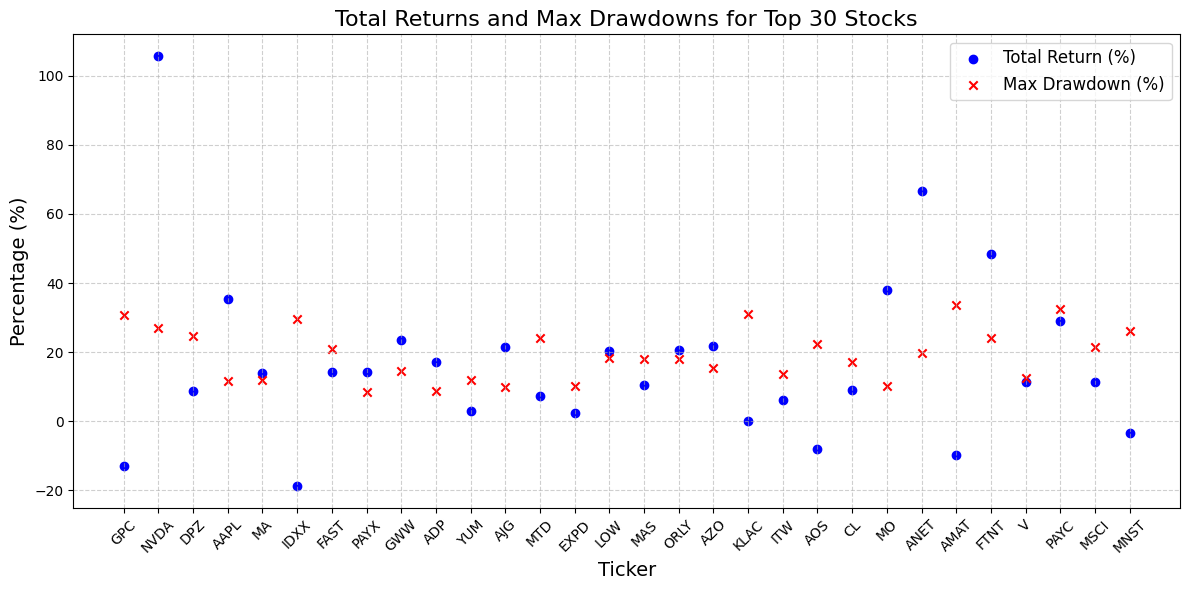


Portfolio Summary:
{'Portfolio Return (%)': 16.914440345099873, 'Portfolio Max Drawdown (%)': 19.325689239450607}


In [5]:
import matplotlib.pyplot as plt

# Function to calculate return and max drawdown
def calculate_metrics(prices):
    if len(prices) < 2:
        return 0, 0  # No meaningful data
    # Total return in percentage
    total_return = ((prices[-1] - prices[0]) / prices[0]) * 100
    # Calculate max drawdown
    peak = prices[0]
    max_drawdown = 0
    for price in prices:
        peak = max(peak, price)
        drawdown = ((peak - price) / peak) * 100
        max_drawdown = max(max_drawdown, drawdown)
    return total_return, max_drawdown

# Collect metrics for all top 30 tickers
metrics = []
for ticker in top_30_tickers:
    prices = get_historical_prices(ticker, start_date, end_date, api_key)
    total_return, max_drawdown = calculate_metrics(prices)
    metrics.append({'Ticker': ticker, 'Total Return (%)': total_return, 'Max Drawdown (%)': max_drawdown})

# Convert metrics into a DataFrame
metrics_df = pd.DataFrame(metrics)

# Plotting the scatter plot for total returns and max drawdowns
plt.figure(figsize=(12, 6))
plt.scatter(metrics_df['Ticker'], metrics_df['Total Return (%)'], label='Total Return (%)', color='blue', marker='o')
plt.scatter(metrics_df['Ticker'], metrics_df['Max Drawdown (%)'], label='Max Drawdown (%)', color='red', marker='x')

# Customize the plot
plt.title('Total Returns and Max Drawdowns for Top 30 Stocks', fontsize=16)
plt.xlabel('Ticker', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()
print("\nPortfolio Summary:")
print(portfolio_summary)